In [1]:
import pandas as pd
adult=pd.read_csv('/content/adult_with_headers.csv')
adult


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [2]:
adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [3]:
adult.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [4]:
adult.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education_num,0
marital_status,0
occupation,0
relationship,0
race,0
sex,0


In [5]:
adult.dropna(inplace=True)

In [6]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
num_cols=adult.select_dtypes(include=['int64','float64']).columns

scaler=StandardScaler()
adult_scaled=adult.copy()
adult_scaled[num_cols]=scaler.fit_transform(adult[num_cols])


scaler_minmax=MinMaxScaler()
adult_minmax_scaled=adult.copy()
adult_scaled[num_cols]=scaler_minmax.fit_transform(adult[num_cols])

In [7]:
'''Standard Scaling is preferred when the data follows a Gaussian distribution. It transforms data to have a mean of 0 and a standard deviation of 1.

Min-Max Scaling is useful when you need to maintain zero and one in the dataset. It scales the data to a fixed range, typically [0, 1].'''

'Standard Scaling is preferred when the data follows a Gaussian distribution. It transforms data to have a mean of 0 and a standard deviation of 1.\n\nMin-Max Scaling is useful when you need to maintain zero and one in the dataset. It scales the data to a fixed range, typically [0, 1].'

In [8]:
# Select categorical columns with less than 5 categories
cate_cols = adult.select_dtypes(include=['object']).nunique()[adult.select_dtypes(include=['object']).nunique() < 5].index

# One-Hot Encoding
adult_onehot = pd.get_dummies(adult, columns=cate_cols)


In [9]:
from sklearn.preprocessing import LabelEncoder

# Select categorical columns with more than 5 categories
label_cols = adult.select_dtypes(include=['object']).nunique()[adult.select_dtypes(include=['object']).nunique() >= 5].index

# Label Encoding
label_encoder = LabelEncoder()
for col in label_cols:
    adult[col] = label_encoder.fit_transform(adult[col])


In [10]:
'''One-Hot Encoding pros: No ordinal relationship implied, widely accepted. Cons: Increases dimensionality.

Label Encoding pros: Simple, keeps data compact. Cons: Can imply an ordinal relationship where there isn't one.'''

"One-Hot Encoding pros: No ordinal relationship implied, widely accepted. Cons: Increases dimensionality.\n\nLabel Encoding pros: Simple, keeps data compact. Cons: Can imply an ordinal relationship where there isn't one."

In [11]:
# 'Age per Hour' - dividing age by hours worked per week
adult['age_per_hour'] = adult['age'] / adult['hours_per_week']

#'Income per Capital' - product of hours worked per week and education level (as a proxy for higher income potential)
adult['income_per_capital'] = adult['hours_per_week'] * adult['education_num']


In [12]:
'''
As there were less int datatypes. It is rational to use them for better model building
Age per Hour: This feature can capture productivity or work intensity.

Income per Capital: Higher education combined with more work hours likely correlates with higher income.'''

'\nAs there were less int datatypes. It is rational to use them for better model building\nAge per Hour: This feature can capture productivity or work intensity.\n\nIncome per Capital: Higher education combined with more work hours likely correlates with higher income.'

In [13]:
adult

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,age_per_hour,income_per_capital
0,39,7,77516,9,13,4,1,1,4,Male,2174,0,40,39,<=50K,0.975000,520
1,50,6,83311,9,13,2,4,0,4,Male,0,0,13,39,<=50K,3.846154,169
2,38,4,215646,11,9,0,6,1,4,Male,0,0,40,39,<=50K,0.950000,360
3,53,4,234721,1,7,2,6,0,2,Male,0,0,40,39,<=50K,1.325000,280
4,28,4,338409,9,13,2,10,5,2,Female,0,0,40,5,<=50K,0.700000,520
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,4,257302,7,12,2,13,5,4,Female,0,0,38,39,<=50K,0.710526,456
32557,40,4,154374,11,9,2,7,0,4,Male,0,0,40,39,>50K,1.000000,360
32558,58,4,151910,11,9,6,1,4,4,Female,0,0,40,39,<=50K,1.450000,360
32559,22,4,201490,11,9,4,1,3,4,Male,0,0,20,39,<=50K,1.100000,180


In [14]:
import numpy as np

# Log transformation for skewed feature 'capital_gain'
adult['capital_gain_log'] = np.log1p(adult['capital_gain'])


In [15]:
'''Log transformation reduces skewness and makes the data more normally distributed, which can improve the performance of many algorithms.'''

'Log transformation reduces skewness and makes the data more normally distributed, which can improve the performance of many algorithms.'

In [16]:
from sklearn.ensemble import IsolationForest

# Apply Isolation Forest
iso_forest = IsolationForest(contamination=0.01, random_state=42)
outliers = iso_forest.fit_predict(adult[num_cols])

# Filter out the outliers
adult_clean = adult[outliers == 1]
'''Outliers can skew model predictions and impact performance. Removing them can lead to more robust models.'''

'Outliers can skew model predictions and impact performance. Removing them can lead to more robust models.'

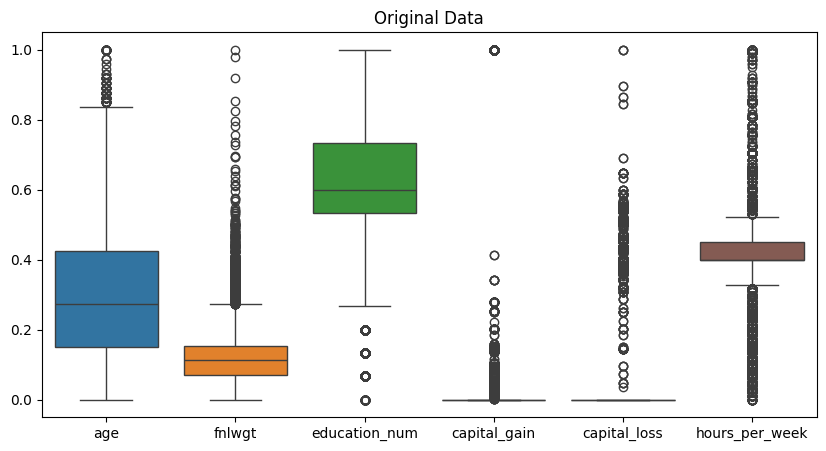

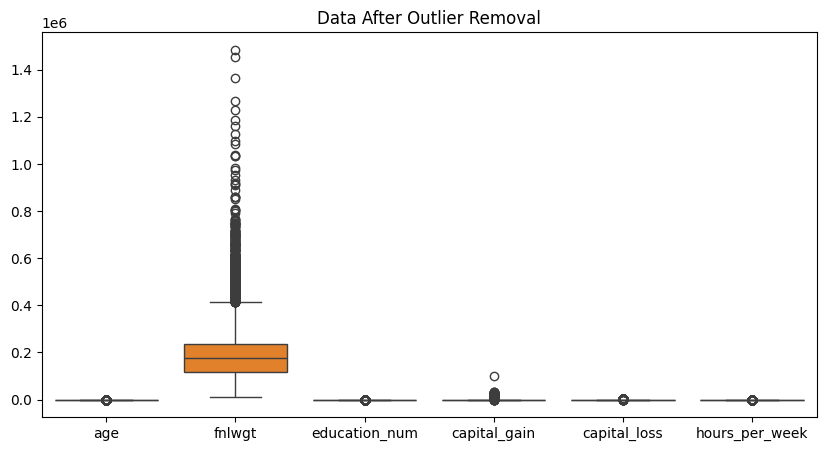

In [17]:
# Visualizing before and after outlier removal to check whether the changes happened or not
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize original data
plt.figure(figsize=(10, 5))
sns.boxplot(data=adult_scaled[num_cols])
plt.title('Original Data')

# Visualize cleaned data
plt.figure(figsize=(10, 5))
sns.boxplot(data=adult_clean[num_cols])
plt.title('Data After Outlier Removal')
plt.show()


In [18]:
!pip install ppscore==1.3.0
!pip install --upgrade pandas==1.5.3 # Install a compatible pandas version
import ppscore as pps

# Calculate PPS matrix
pps_matrix = pps.matrix(adult_clean)
print(pps_matrix.head())

# Compare with correlation matrix
corr_matrix = adult_clean.corr()
print(corr_matrix)

     x              y  ppscore            case  is_valid_score  \
0  age            age      1.0  predict_itself            True   
1  age      workclass      0.0      regression            True   
2  age         fnlwgt      0.0      regression            True   
3  age      education      0.0      regression            True   
4  age  education_num      0.0      regression            True   

                metric  baseline_score   model_score                    model  
0                 None          0.0000      1.000000                     None  
1  mean absolute error          0.7564      0.889262  DecisionTreeRegressor()  
2  mean absolute error      77515.1178  78903.943015  DecisionTreeRegressor()  
3  mean absolute error          2.7244      2.764712  DecisionTreeRegressor()  
4  mean absolute error          1.8760      1.913453  DecisionTreeRegressor()  
                         age  workclass    fnlwgt  education  education_num  \
age                 1.000000   0.003213 -0.0

<ipython-input-18-5c3b12e406ff>:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = adult_clean.corr()
